# BackGround 

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.

People who are new to the cricket can go through the following links 

1. About Cricket
https://en.wikipedia.org/wiki/Cricket

2. Cricket Rules
https://www.cricket-rules.com/




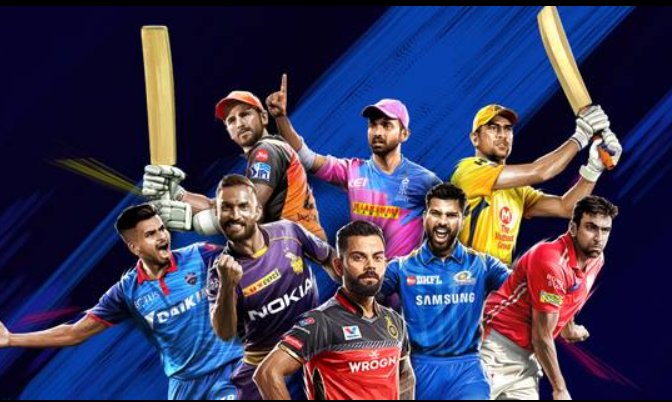


# About the Dataset

The Data contains following the columns :- 

1. id :- Each row has a unique id 
2. season :- The year in which the game is played
3. city:- City in which the game was played
4. date:- Data on which the game was played 
5. team1:- Name of the  team
6. team2:- Name of the other team
7. toss_winner:- team which won the toss
8. toss_decision :- decision after winning the toss whether to bat ot bowl
9. result:- whether the match has outcome , tie or others
10. dl_applied:- Whether the duckworth lewis is applied or not
11. winner :- team winning the game
12. win_by_runs:- the no of runs by which the team won
13. win_by_wickets:-the no of wickets by which the team win
14. player_of_match:- the player with the most outstanding performance
15. venue:- The stadium where the match was played
16. umpire 1:- Name of the first Umpire
17. umpire 2:- Name of the second Umpire
18. umpire 3:- Name of the third empire




# 1. Import Libraries 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 2. Data Exploration

In [ ]:
# Read the dataset

ipl_df=pd.read_csv("/kaggle/input/indian-premier-league-match-analysis/matches.csv")

In [ ]:
# Shape of the Dataset

ipl_df.shape

In [ ]:
#First five dataset

ipl_df.head()

In [ ]:
#Tail of the Data Set

ipl_df.tail()

In [ ]:
#Display the column names

ipl_df.columns

In [ ]:
#Data type of the attribute

ipl_df.dtypes

**We have around 5 attributes which are numeric and continuous in nature and others are categorical by nature** 

# 3. Data Preprocessing

## Handling Missing Values 

In [ ]:
# Checking for the null values in the columns
ipl_df.isna().any()

In [ ]:
# Checking for the sum of the null values in the columns

Sum_train = ipl_df.isnull().sum()
Percentage = ( ipl_df.isnull().sum()/ipl_df.isnull().count())
pd.concat([Sum_train,Percentage], axis =1, keys= ['Sum', 'Percentage'])

In [ ]:
# The umpire3 column has is blank we will drop that column

ipl_df.drop(['umpire3'], axis=1,inplace=True)

In [ ]:
# Dropping the null values column as their percentage is very less

ipl_df.dropna(inplace=True)

In [ ]:
#We have not lost that much of data 

ipl_df.shape

In [ ]:
ipl_df["season"].value_counts()

# 4. Data Analysis thorugh visualization

In [ ]:
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

## No of matches played per season 


In [ ]:
sns.countplot(ipl_df["season"])

## No of matches at each Venue

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=ipl_df)
plt.xticks(rotation='vertical')
plt.show()

## No of matches Played at each city

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='city', data=ipl_df)
plt.xticks(rotation='vertical')
plt.show()

## No of matches played by each team

In [ ]:
ipl_temp_df = pd.melt(ipl_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=ipl_temp_df)
plt.xticks(rotation='vertical')
plt.show()

## Number of wins per team



In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=ipl_df)
plt.xticks(rotation='vertical')
plt.show()

## Toss Decision

In [ ]:
ipl_temp_series = ipl_df.toss_decision.value_counts()
labels = (np.array(ipl_temp_series.index))
sizes = (np.array((ipl_temp_series / ipl_temp_series.sum())*100))
colors = ['violet', 'red']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

### Most of the decision is to field first 

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=ipl_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Win percentage of the team batting second

no_of_wins = (ipl_df.win_by_wickets>0).sum()
no_of_loss = (ipl_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(no_of_wins + no_of_loss)
sizes = [(no_of_wins/total)*100, (no_of_loss/total)*100]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

In [ ]:
# So percentage of times teams batting second has won is 53.6. Now let us split this by year and see the distribution.

ipl_df["field_win"] = "win"
ipl_df["field_win"].loc[ipl_df['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=ipl_df)
plt.xticks(rotation='vertical')
plt.show()


# Top players of the match

In [ ]:
ipl_temp_series = ipl_df.player_of_match.value_counts()[:10]
labels = np.array(ipl_temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(ipl_temp_series), width=width, color='g')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

# Top Empires of the Match

In [ ]:
temp_df = pd.melt(ipl_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

## Maximum Toss Winners

In [ ]:
plt.subplots(figsize=(8,5))
sns.barplot(x=ipl_df.toss_winner.value_counts().values,y=ipl_df.toss_winner.value_counts().index,palette="Set1")

# How lucky are the toss winning teams?:



In [ ]:
ipl_df['toss_winner_is_winner'] = 'no'
ipl_df['toss_winner_is_winner'].loc[ipl_df.toss_winner == ipl_df.winner] = 'yes'
temp_series = ipl_df.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

In [ ]:
# Let us also look at the team wise break up. If the team wins the toss, will it end up in the winning side. Will be interesting to see.

plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=ipl_df)
plt.xticks(rotation='vertical')
plt.show()

# No. of wins by team in each city(all the seasons)

In [ ]:

x, y = 2008, 2017
while x < y:
    wins_percity = ipl_df[ipl_df['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(ipl_df['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1


## No of wins by team by each venue(all the seasons)

In [ ]:
x, y = 2008, 2017
while x < y:
    wins_pervenue = ipl_df[ipl_df['season'] == x].groupby(['winner', 'venue'])['id'].count().unstack()
    plot = wins_pervenue.plot(kind='bar', stacked=True, title="Team wins in different venues\nSeason "+str(x), figsize=(10,15))
    sns.set_palette("Paired", len(ipl_df['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

# No of matches in which D/L applied Seasonwise

In [ ]:
# Seasons with D/L method applied matches
dl=ipl_df.query('dl_applied==1')['season']
dl


In [ ]:
fig, ax=plt.subplots(figsize=(8,8))
#ax.set_ylim([0,5])
ax.set_title('No. of matches where D/L method was applied, season wise\n')
sns.countplot(x=dl, data=ipl_df)
plt.xlabel('\nSeason')
plt.ylabel('No. of matches\n')
plt.show()

# Team Performance 

## Team Performance winning by run

In [ ]:
ipl_df[ipl_df['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Winning by Runs - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_runs', data=ipl_df[ipl_df['win_by_runs']>0], orient = 'h');
plt.show()


## Team Performance winning by wickets

In [ ]:
ipl_df[ipl_df['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Winning by Wickets - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=ipl_df[ipl_df['win_by_wickets']>0], orient = 'h')